### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Any duplicate values?
print(reviews.duplicated().sum())

0


In [5]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Basic descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews = reviews.drop(columns = ['language', 'platform'])

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [8]:
# Rename the column headers.
reviews_updated = reviews.rename(columns = {'remuneration (k£)':'remuneration', 
                                            'spending_score (1-100)':'spending_score'})

# View column names.
reviews_updated.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews_updated.to_csv('turtle_reviews_clean', index=False)

In [10]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('turtle_reviews_clean')

# View DataFrame.
reviews_clean.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear regression

### 5a) spending vs loyalty

In [11]:
# Define independent variable.
X = reviews_clean['spending_score']

# Define dependent variable.
y = reviews_clean['loyalty_points']

# Split the data into train and test sets (70% train, 30% test)X.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adding a constant to the independent variable (for the intercept).
X_train = sm.add_constant(X_train)

# Create model and print summary of metrics.
model = sm.OLS(y_train, X_train).fit()

# Displaying the model.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1136.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          1.01e-182
Time:                        09:10:27   Log-Likelihood:                -11595.
No. Observations:                1400   AIC:                         2.319e+04
Df Residuals:                    1398   BIC:                         2.320e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -84.0022     55.741     -1.

In [12]:
# Extract the standard errors.
standard_errors = model.bse 
print("The standard errors are: ")
print(standard_errors)

# Adding a constant to the independent variable (for the intercept).
X_test = sm.add_constant(X_test)

# Extract the predicted values.
y_pred = model.predict(X_test)
print("The predicted values are: ")
print(y_pred.head())

The standard errors are: 
const             55.741113
spending_score     0.982059
dtype: float64
The predicted values are: 
1860      48.372642
353     2431.120310
1333    2265.651722
905     1305.933912
1289    1438.308782
dtype: float64


In [13]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = pd.DataFrame({'Coefficient': model.params, 'Standard Error': model.bse, 
                                 't-value': model.tvalues, 'p-value': model.pvalues})

# View the output.
print("Regression Table:\n", regression_table)

Regression Table:
                 Coefficient  Standard Error    t-value        p-value
const            -84.002228       55.741113  -1.507007   1.320349e-01
spending_score    33.093718        0.982059  33.698300  1.005884e-182


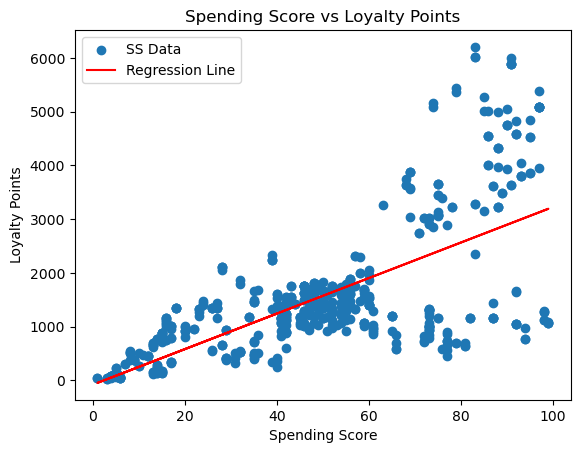

In [14]:
# Plot the graph with a regression line.
plt.scatter(X_test['spending_score'], y_test, label='SS Data')
plt.plot(X_test['spending_score'], y_pred, color='red', label='Regression Line')

# Setting the labels.
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Spending Score vs Loyalty Points')
plt.legend()
plt.show()

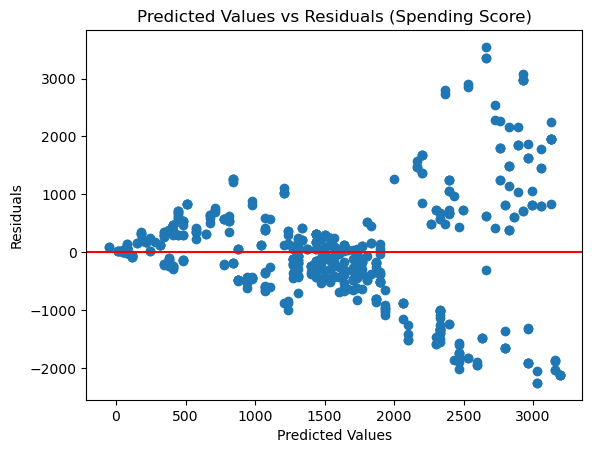

In [15]:
# Working out the differences between the actual and predicted results for the spending score.
residuals = y_test - y_pred

# Setting the labels.
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals (Spending Score)')
plt.show()

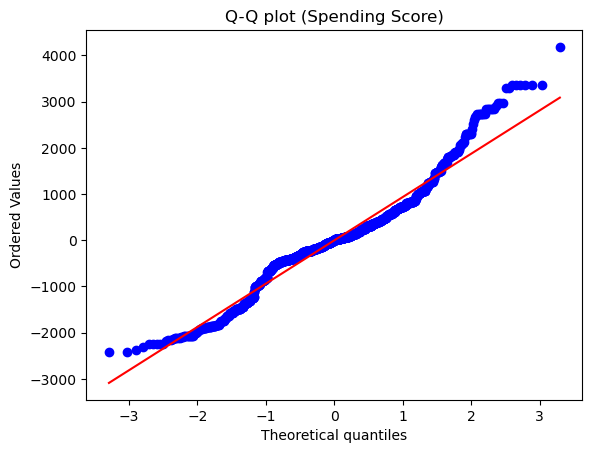

In [16]:
# Plot the q-q plot for the spending score.
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title("Q-Q plot (Spending Score)")
plt.show()

### 5b) renumeration vs loyalty

In [17]:
# Define independent variable.
X2 = reviews_clean['remuneration']

# Define dependent variable.
y = reviews_clean['loyalty_points']

# Split the data into train and test sets (70% train, 30% test)X.
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

# Adding a constant to the independent variable (for the intercept).
X2_train = sm.add_constant(X2_train)

# Create model and print summary of metrics.
model_2 = sm.OLS(y_train, X2_train).fit()

# Displaying the model.
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     942.0
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          1.42e-158
Time:                        09:10:45   Log-Likelihood:                -11650.
No. Observations:                1400   AIC:                         2.330e+04
Df Residuals:                    1398   BIC:                         2.332e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -105.2335     61.163     -1.721   

In [18]:
# Extract the standard errors.
standard_errors_2 = model_2.bse 
print("The standard errors are: ")
print(standard_errors_2)

# Adding a constant to the independent variable (for the intercept).
X2_test = sm.add_constant(X2_test)

# Extract the predicted values.
y_pred_2 = model_2.predict(X2_test)
print("The predicted values are: ")
print(y_pred_2.head())

The standard errors are: 
const           61.163458
remuneration     1.155083
dtype: float64
The predicted values are: 
1860     766.883008
353     2162.269467
1333    1987.846159
905     1697.140647
1289    1580.858442
dtype: float64


In [19]:
# Set the X coefficient and the constant to generate the regression table.
regression_table_2 = pd.DataFrame({'Coefficient': model_2.params, 'Standard Error': model_2.bse, 
                                 't-value': model_2.tvalues, 'p-value': model_2.pvalues})


# View the output.
print("Regression Table:\n", regression_table_2)

Regression Table:
               Coefficient  Standard Error    t-value        p-value
const         -105.233529       61.163458  -1.720529   8.555753e-02
remuneration    35.451892        1.155083  30.692080  1.423539e-158


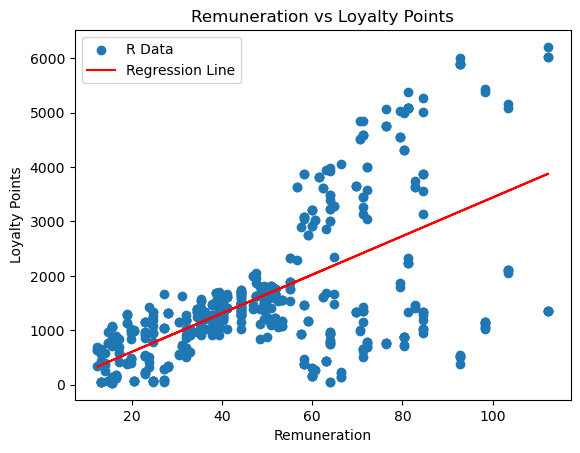

In [20]:
# Plot the graph with a regression line.
plt.scatter(X2_test['remuneration'], y_test, label='R Data')
plt.plot(X2_test['remuneration'], y_pred_2, color='red', label='Regression Line')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Remuneration vs Loyalty Points')
plt.legend()
plt.show()

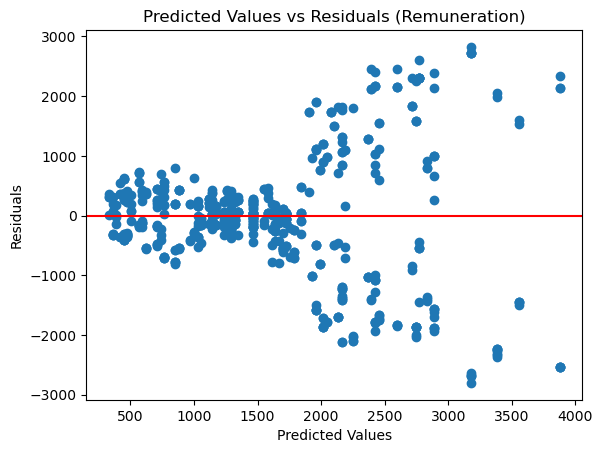

In [21]:
# Working out the differences between the actual and predicted results for the remuneration.
residuals_2 = y_test - y_pred_2

# Setting the labels.
plt.scatter(y_pred_2, residuals_2)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals (Remuneration)')
plt.show()

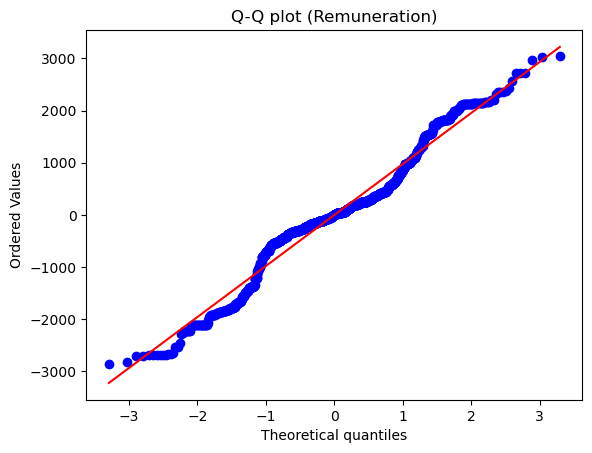

In [22]:
# Plot the q-q plot for the remuneration.
stats.probplot(model_2.resid, dist="norm", plot=plt)
plt.title("Q-Q plot (Remuneration)")
plt.show()

### 5c) age vs loyalty

In [23]:
# Define independent variable.
X3 = reviews_clean['age']

# Define dependent variable.
y = reviews_clean['loyalty_points']

# Split the data into train and test sets (70% train, 30% test)X.
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

# Adding a constant to the independent variable (for the intercept).
X3_train = sm.add_constant(X3_train)

# Create model and print summary of metrics.
model_3 = sm.OLS(y_train, X3_train).fit()

# Displaying the model.
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.127
Date:                Sun, 13 Apr 2025   Prob (F-statistic):              0.145
Time:                        09:11:24   Log-Likelihood:                -12010.
No. Observations:                1400   AIC:                         2.402e+04
Df Residuals:                    1398   BIC:                         2.403e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1730.4452    105.465     16.408      0.0

In [24]:
# Extract the standard errors.
standard_errors_3 = model_3.bse 
print("The standard errors are: ")
print(standard_errors_3)

# Adding a constant to the independent variable (for the intercept).
X3_test = sm.add_constant(X3_test)

# Extract the predicted values.
y_pred_3 = model_3.predict(X3_test)
print("The predicted values are: ")
print(y_pred_3.head())

The standard errors are: 
const    105.465250
age        2.519742
dtype: float64
The predicted values are: 
1860    1465.833511
353     1590.789022
1333    1609.164832
905     1645.916453
1289    1550.362239
dtype: float64


In [25]:
# Set the X coefficient and the constant to generate the regression table.
regression_table_3 = pd.DataFrame({'Coefficient': model_3.params, 'Standard Error': model_3.bse, 
                                 't-value': model_3.tvalues, 'p-value': model_3.pvalues})

# View the output.
print("Regression Table:\n", regression_table_3)

Regression Table:
        Coefficient  Standard Error    t-value       p-value
const  1730.445181      105.465250  16.407728  1.824321e-55
age      -3.675162        2.519742  -1.458547  1.449144e-01


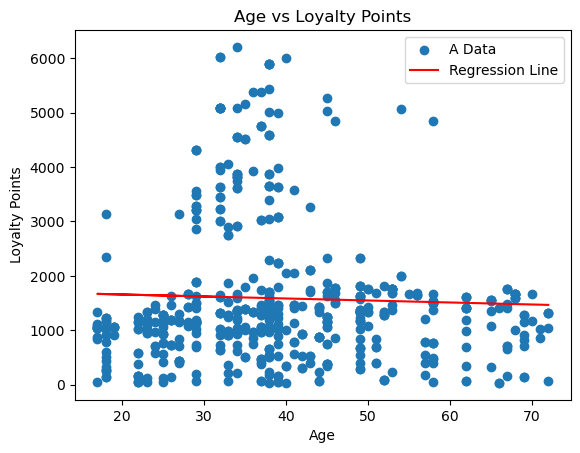

In [26]:
# Plot the graph with a regression line.
plt.scatter(X3_test['age'], y_test, label='A Data')
plt.plot(X3_test['age'], y_pred_3, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Age vs Loyalty Points')
plt.legend()
plt.show()

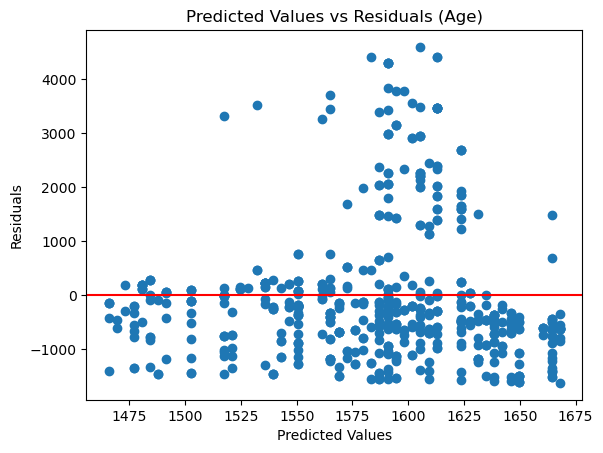

In [27]:
# Working out the differences between the actual and predicted results for the age.
residuals_3 = y_test - y_pred_3

# Setting the labels.
plt.scatter(y_pred_3, residuals_3)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals (Age)')
plt.show()

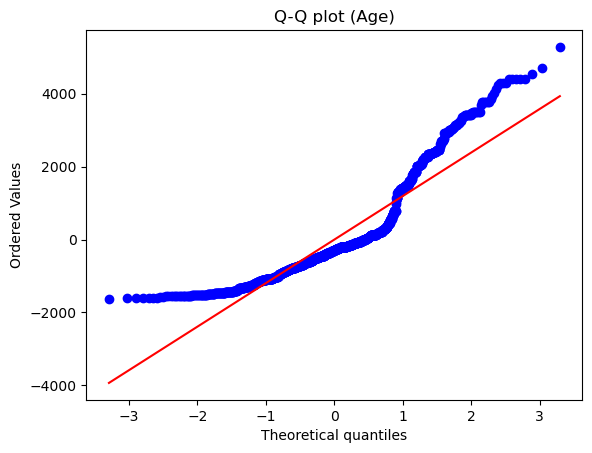

In [28]:
# Plot the q-q plot for the age.
stats.probplot(model_3.resid, dist="norm", plot=plt)
plt.title("Q-Q plot (Age)")
plt.show()

## 6. Observations and insights

***Your observations here...***






Spending Score

* R-squared value (0.448) - Approximately 44.8% of the variance in loyalty points is down to the spending score.
  Coefficient of spending score (33.1) - This suggests that when a spending score increases by one unit, 
  loyalty points increase by around 33 points.
* p-value (0) - With the p-value being below 0.001, 
  this shows that spending score is a significant predictor of loyalty points.
* The relationship between the spending score and loyalty points has shown to be mainly positive. It seems that 
  the more the customers spend, the more loyalty points they gain.
* Normality relationship

Remuneration

* R-squared value (0.403) - Approximately 40.3% of the variance in loyalty points is down to remuneration. 
  Coefficient of remuneration (35.45) - This reveals that when the remuneration increases by £1000, 
  loyalty points increase by averagely 35 points.
* p-value (0) - With the p-value being below 0.001, 
  this shows that remuneration is a significant predictor of loyalty points.
* Just like spending score, the relationship between remuneration and loyalty points is positive. 
  This shows that the customers with higher-income are the ones with the more loyalty points.
* Normality relationship

Age

* R-squared value (0.002) - 0.2% of the variance in loyalty points is down to age. 
  Coefficient of age (-3.6752) - This shows a negative relationship between age and loyalty points.
* p-value (0.145) - With the p-value being above 0.001, 
  this shows that age is not a significant predictor of loyalty points.
* Unlike spending score and remuneration, age does not display to have a relationship with loyalty points.
* Non-normality relationship

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [29]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
import math
from sklearn.preprocessing import LabelEncoder

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [30]:
# Create your new DataFrame.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame.
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [31]:
# Check for missing values.
df2.isnull().sum()

gender            0
age               0
remuneration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

In [32]:
# View descriptive statistics.
df2.describe()

age  remuneration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000

In [33]:
# Drop unnecessary columns.
df2 = df2.drop(columns = ['gender', 'education', 'review', 'summary'])

# View column names.
df2.columns

Index(['age', 'remuneration', 'spending_score', 'loyalty_points', 'product'], dtype='object')

In [34]:
# Removing 'loyalty points' from the input data.
cols = df2.columns[df2.columns != 'loyalty_points']

# Specify Y.
y = df2['loyalty_points']

# Specify X.
X = df2[cols]

In [35]:
# Exploring the data.
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2000 non-null   int64  
 1   remuneration    2000 non-null   float64
 2   spending_score  2000 non-null   int64  
 3   product         2000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 62.6 KB
None


## 2. Create train and test data sets.

In [36]:
# Split the data into test and train data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Create Decision tree regressor

In [37]:
feature_cols = [c for c in X.columns]
feature_cols

['age', 'remuneration', 'spending_score', 'product']

In [38]:
from sklearn.model_selection import GridSearchCV

# Working out the best values for the 'max_depth', 'min_samples_leaf' and 'min_samples_split'.
param_grid = {'max_depth': [10, 15, 20, None], 'min_samples_leaf': [1, 5, 10], 'min_samples_split': [2, 10, 20]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# View the result. 
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [39]:
# Create Decision Tree Regressor object.
dtr = DecisionTreeRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train Decision Tree Regressor.
dtr.fit(X_train, y_train)

# Create predictions on test data.
y_pred = dtr.predict(X_test)

In [40]:
# Evaluate the model.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# View the results.
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 8614.445069444444
Mean Absolute Error: 33.0425
Root Mean Squared Error: 92.81403487320462


## 4. Fit and plot final model.

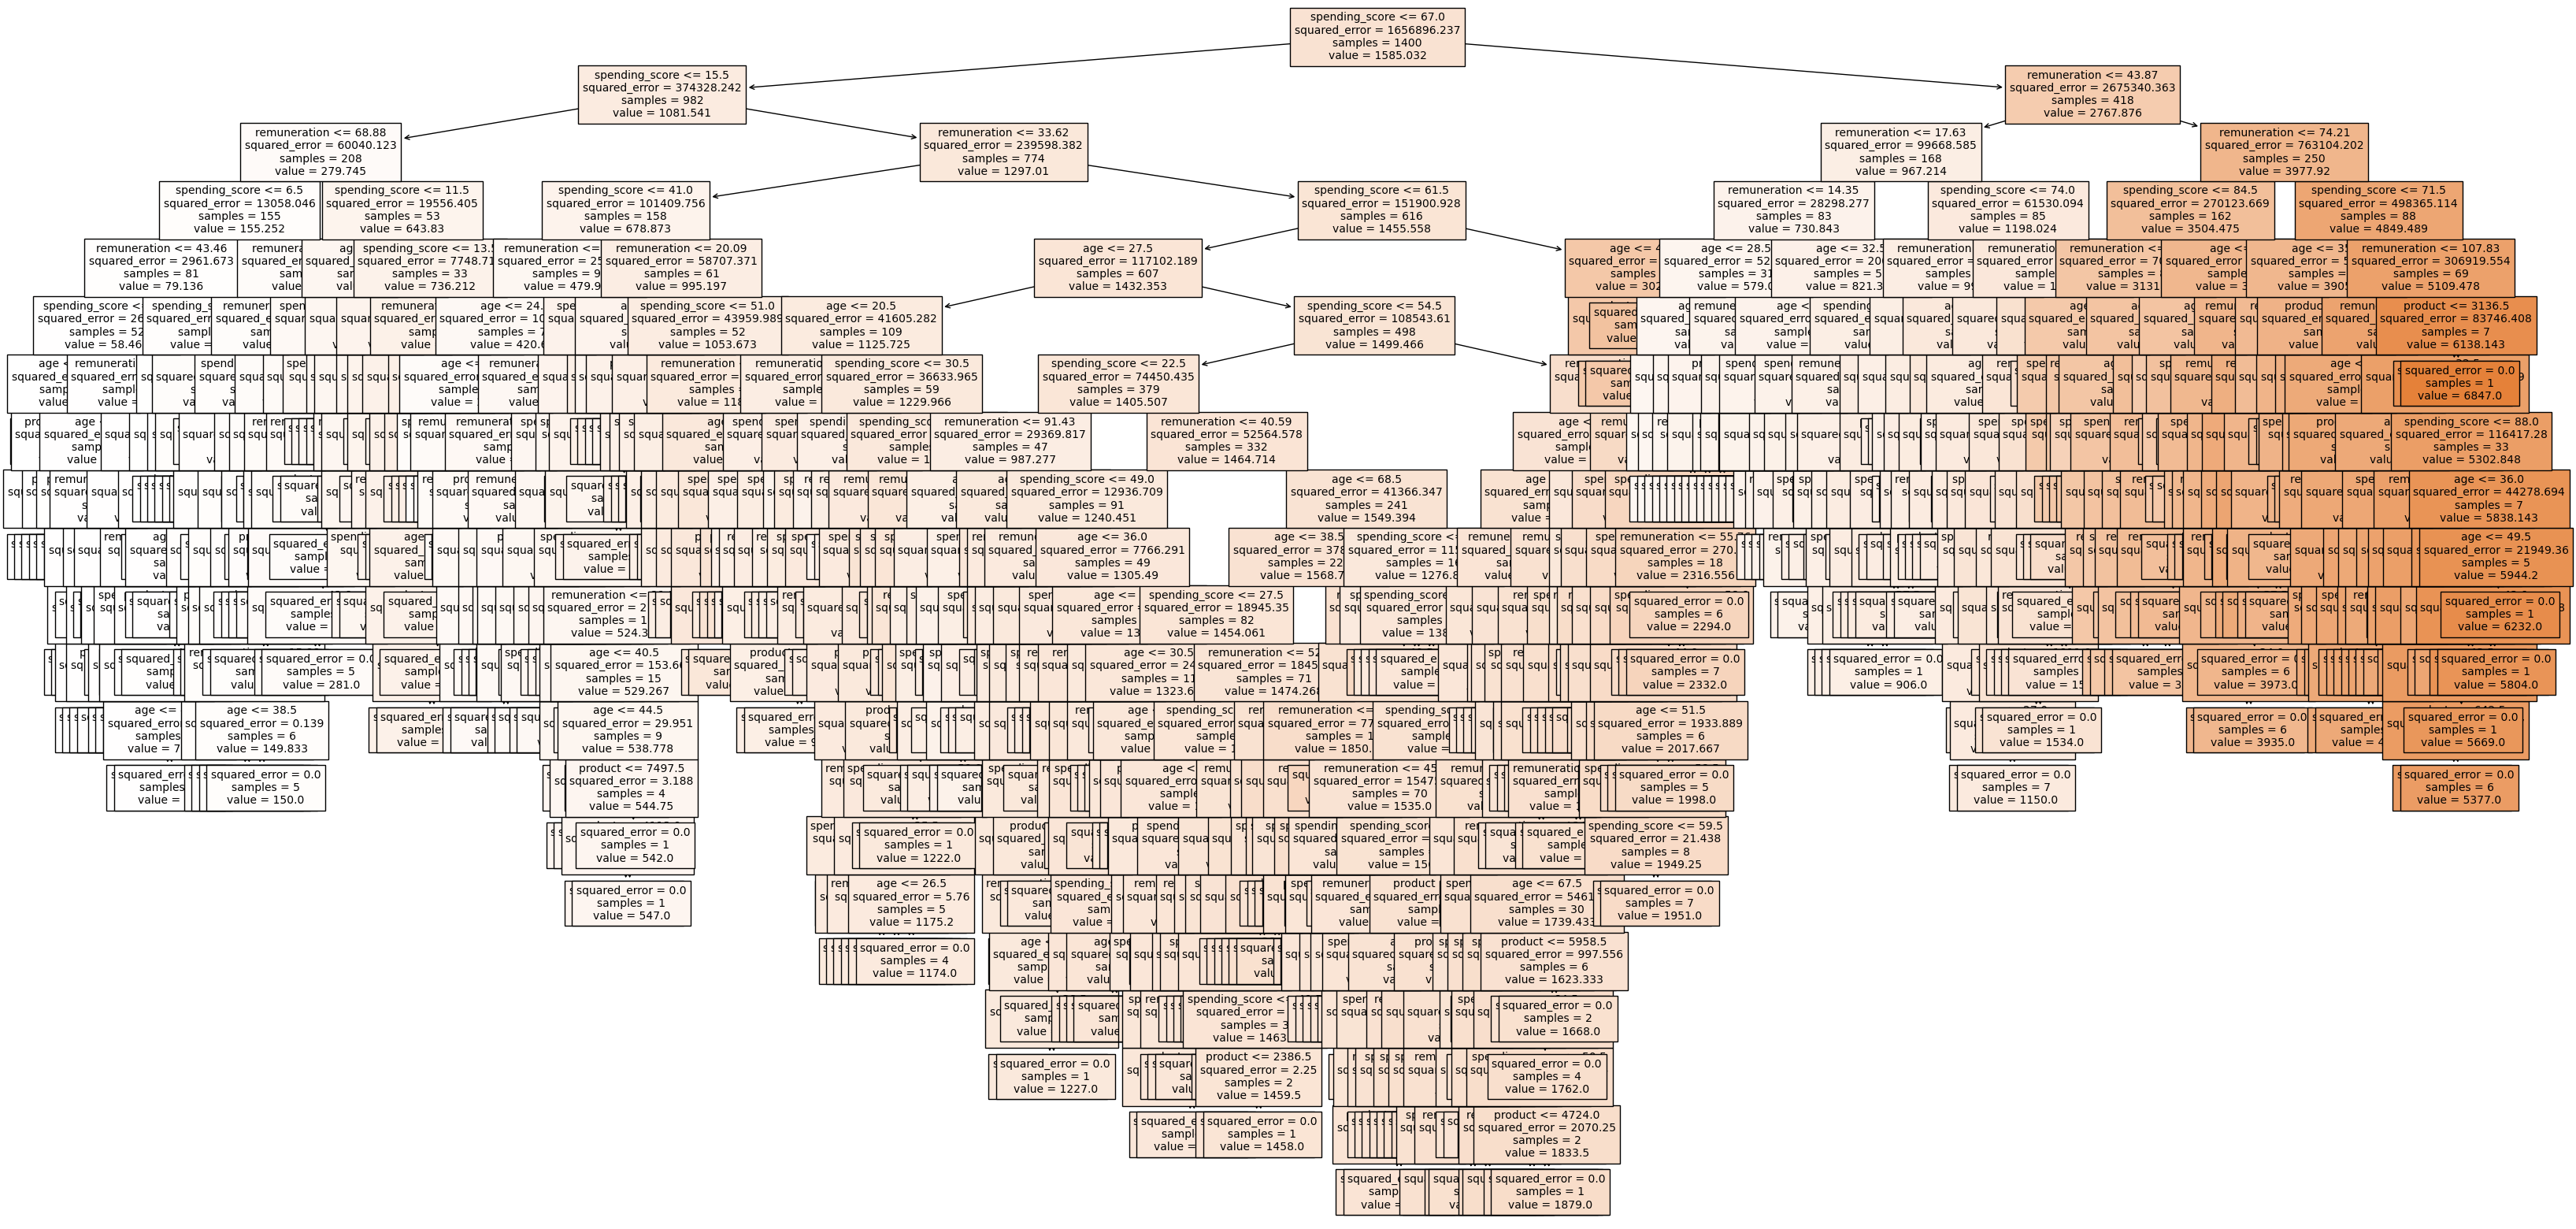

In [41]:
# Visualising the decision tree.
plt.figure(figsize=(40, 20))
plot_tree(dtr, feature_names=feature_cols, filled=True, fontsize=10)
plt.show()

## 5. Discuss: Insights and observations

***Your observations here...***

* Judging by this decision tree, remuneration and spending score are the best predictors for loyalty points. 
  This means Turtle Games should be targeting high-earning and high-spending customers.
* It was necessary to prune the decision tree model to reduce the overfitting but still gain the most accurate 
  results as possible.
    
A Decision Tree model was applied to explore potential patterns in customer loyalty point accumulation. However, 
the insights generated were largely consistent with those already identified through the regression analysis — 
specifically, the importance of remuneration and spending score as key predictors. 
To avoid unnecessary duplication and maintain focus, 
the Decision Tree analysis was not included in the final report or presentation

# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

In [42]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/27/4a/1afe473760b07663710a75437b795ef37362aebb8bf513ff3bbf78fbd0c6/scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl (9.0 MB)
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


## 1. Load and explore the data

In [43]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load the CSV file(s) as df3.
df3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [45]:
# Drop unnecessary columns.
df3_clean = df3.drop(columns=['gender','age','loyalty_points', 'education', 'product', 'review', 'summary'])

# View DataFrame.
df3_clean.head()

remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [46]:
# Explore the data.
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [47]:
# Descriptive statistics.
df3_clean.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

Text(0.5, 1.0, 'Remuneration vs Spending Score (Scatterplot)')

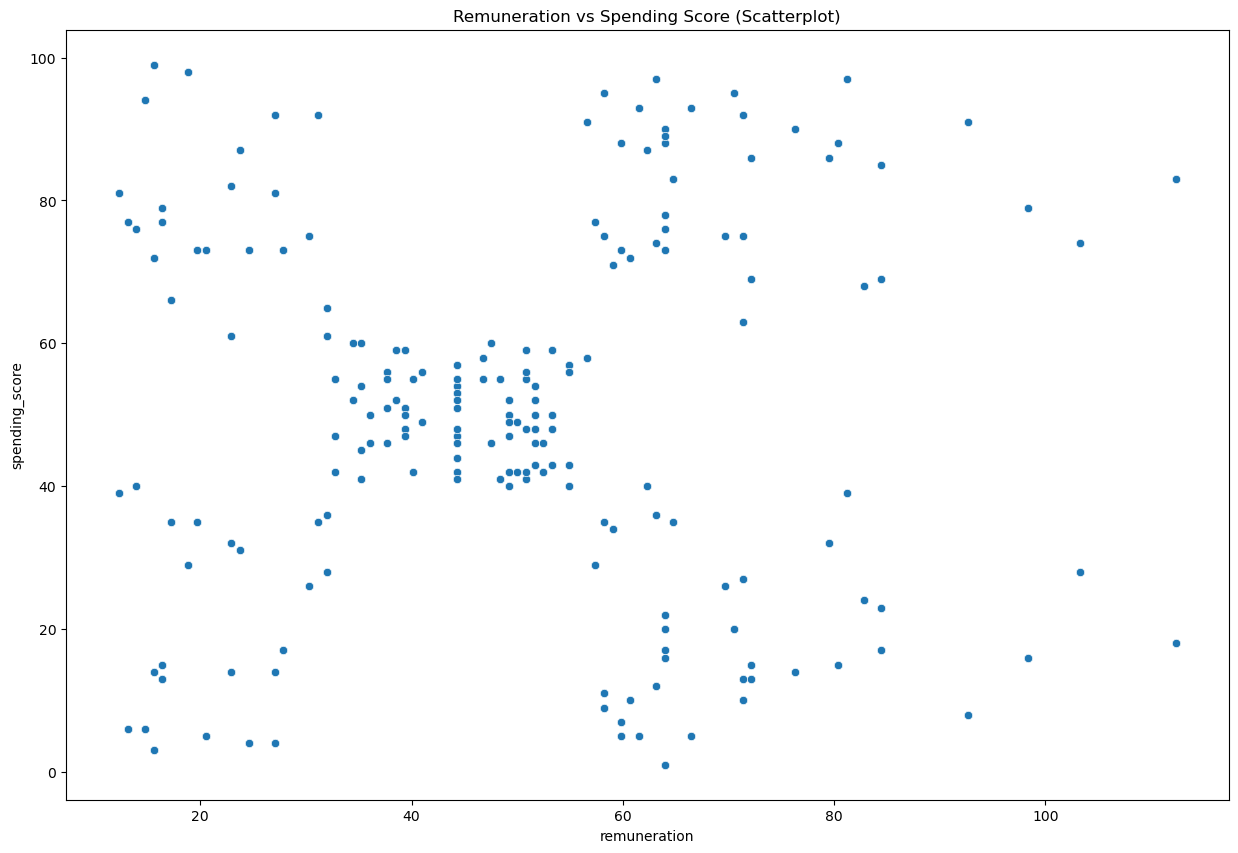

In [48]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score', data=df3_clean)
plt.title('Remuneration vs Spending Score (Scatterplot)')

Text(0.5, 1.05, 'Remuneration vs Spending Score (Pairplot)')

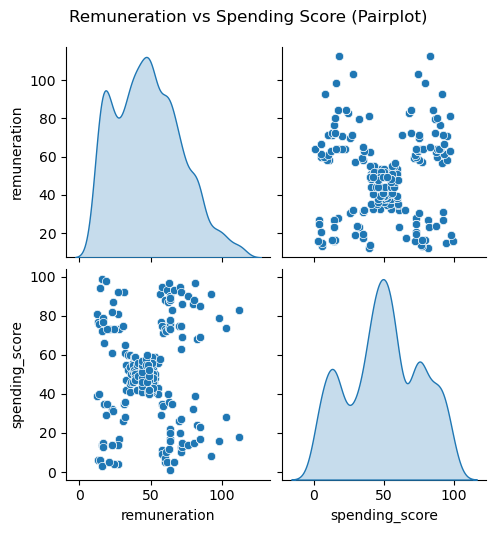

In [49]:
# Create a pairplot with Seaborn.
x = df3_clean[['remuneration', 'spending_score']]
sns.pairplot(df3_clean, vars=x, diag_kind='kde')
plt.suptitle('Remuneration vs Spending Score (Pairplot)', y=1.05)

## 3. Elbow and silhoutte methods

Text(0, 0.5, 'SSE')

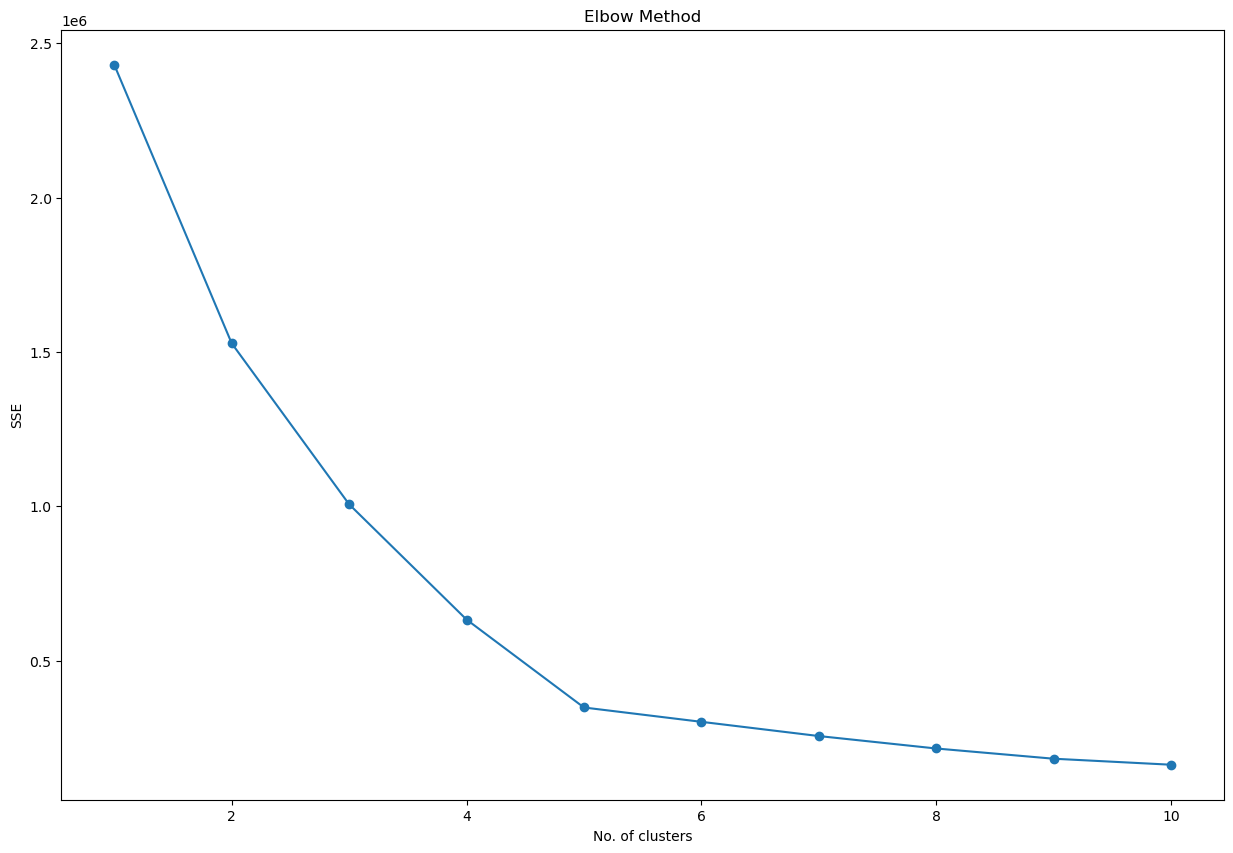

In [50]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans

# Setting the plot.
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

# Plot the Elbow scores.    
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette Score')

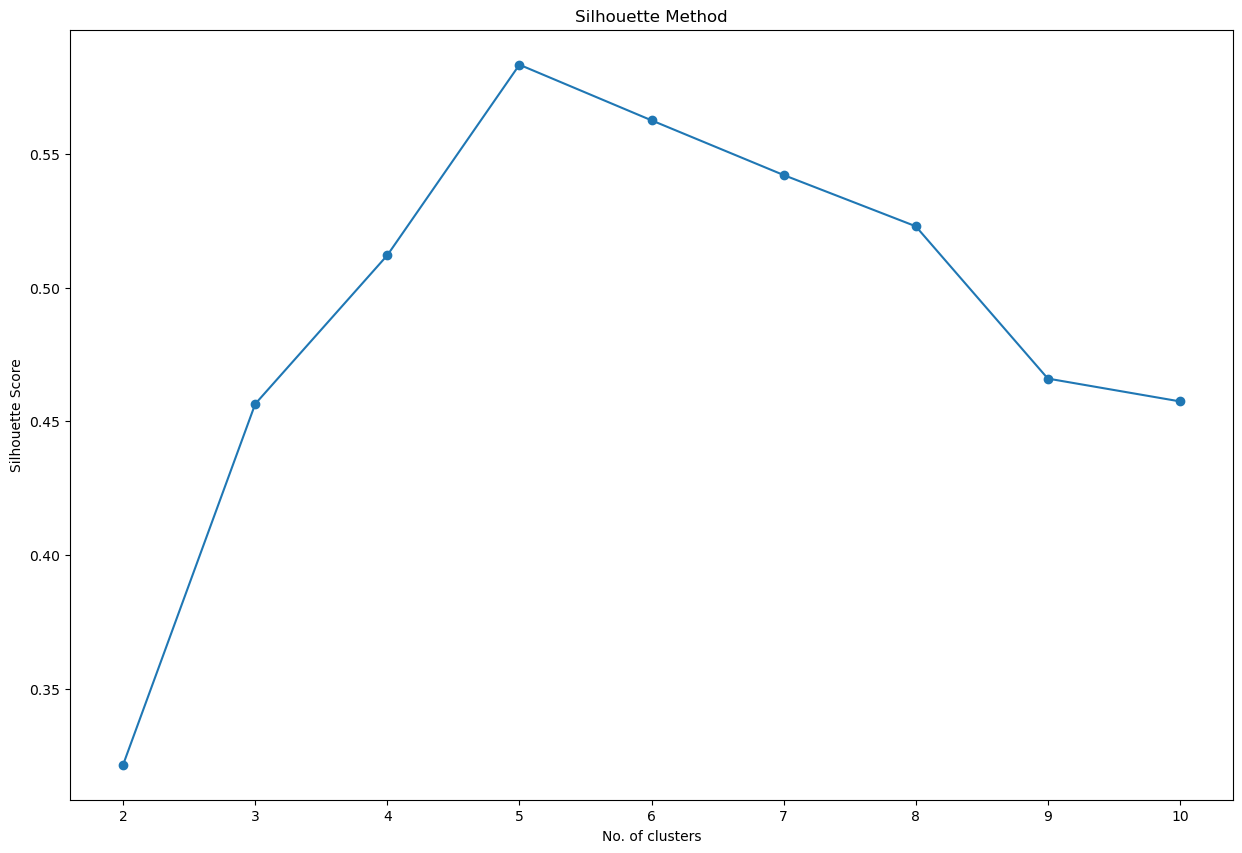

In [51]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax=10

# Setting the plot.
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric='euclidean'))

# Plot the Silhouette scores.
plt.plot(range(2, kmax+1), sil, marker='o')
plt.title('Silhouette Method')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Score')

## 4. Evaluate k-means model at different values of *k*

Text(0.5, 1.05, 'K-Means Clustering on Remuneration and Spending Score (k=4)')

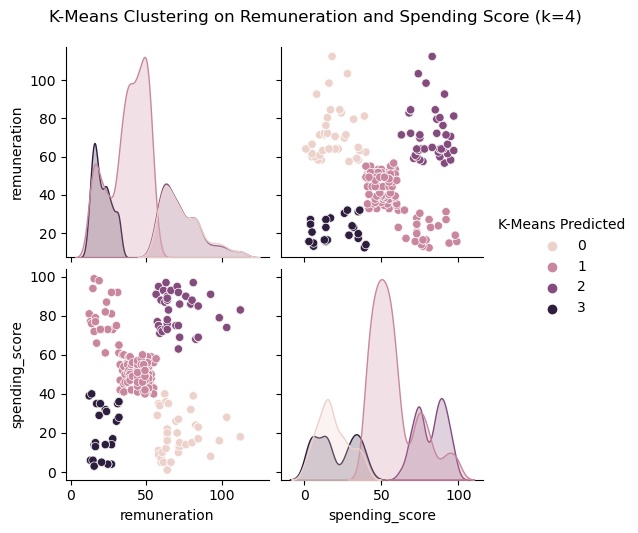

In [52]:
# Setting the clusters = 4.
kmeans_2 = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=42).fit(x)
clusters = kmeans_2.labels_
x['K-Means Predicted'] = clusters

# Creating the plot.
sns.pairplot(x, hue='K-Means Predicted', diag_kind='kde')
plt.suptitle('K-Means Clustering on Remuneration and Spending Score (k=4)', y=1.05)

Text(0.5, 1.05, 'K-Means Clustering on Remuneration and Spending Score (k=5)')

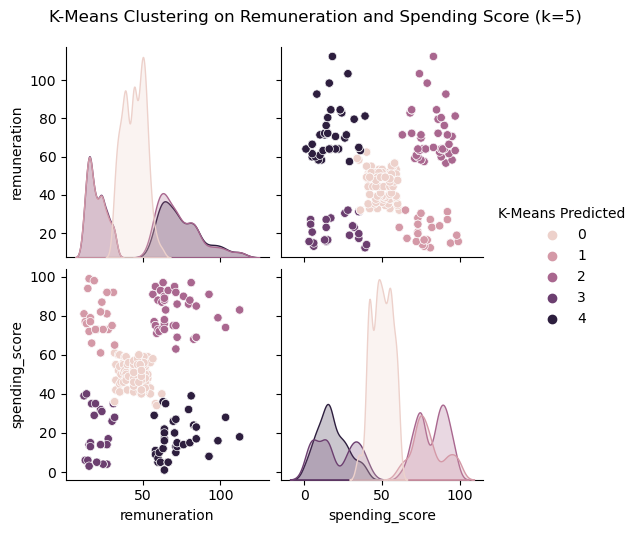

In [53]:
# Setting the clusters = 5.
kmeans_3 = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=42).fit(x)
clusters = kmeans_3.labels_
x['K-Means Predicted'] = clusters

# Creating the plot.
sns.pairplot(x, hue='K-Means Predicted', diag_kind='kde')
plt.suptitle('K-Means Clustering on Remuneration and Spending Score (k=5)', y=1.05)

Text(0.5, 1.05, 'K-Means Clustering on Remuneration and Spending Score (k=6)')

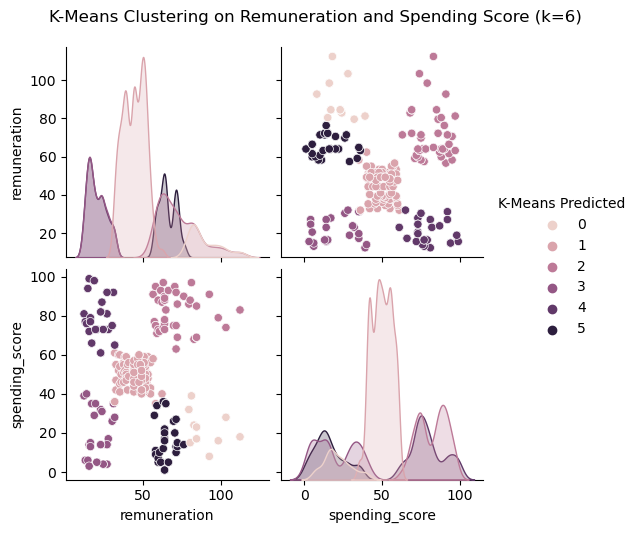

In [55]:
# Setting the clusters = 6.
kmeans_4 = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=42).fit(x)
clusters = kmeans_4.labels_
x['K-Means Predicted'] = clusters

# Creating the plot.
sns.pairplot(x, hue='K-Means Predicted', diag_kind='kde')
plt.suptitle('K-Means Clustering on Remuneration and Spending Score (k=6)', y=1.05)

## 5. Fit final model and justify your choice

Text(0.5, 1.05, 'K-Means Clustering on Remuneration and Spending Score (k=5)')

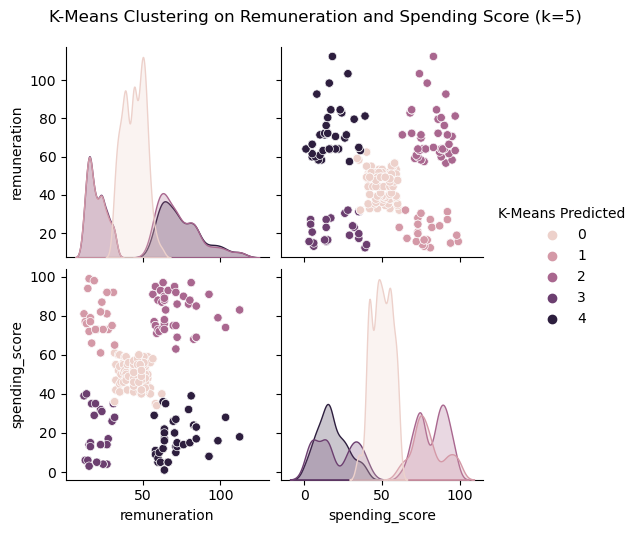

In [56]:
# Keeping the cluster number = 5.
kmeans_final = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=42).fit(x)
clusters = kmeans_final.labels_
x['K-Means Predicted'] = clusters

# Creating the plot.
sns.pairplot(x, hue='K-Means Predicted', diag_kind='kde')
plt.suptitle('K-Means Clustering on Remuneration and Spending Score (k=5)', y=1.05)

In [57]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
2    356
4    330
3    271
1    269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

In [58]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


Text(0.5, 1.0, 'Remuneration vs Spending Score (5 Clusters)')

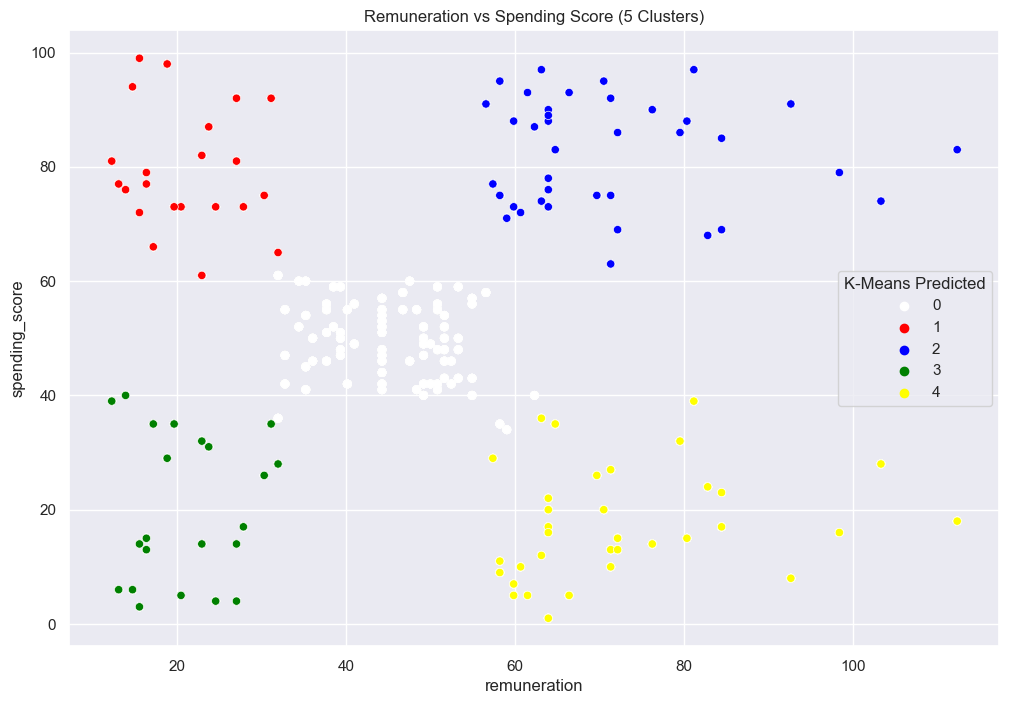

In [59]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})
sns.scatterplot(x='remuneration', y ='spending_score',data=x, hue='K-Means Predicted', 
                palette=['white', 'red', 'blue', 'green', 'yellow'])
plt.title('Remuneration vs Spending Score (5 Clusters)')

## 7. Discuss: Insights and observations

***Your observations here...***

Remuneration vs Spending Score

* Scatterplot: No strong relationship between remuneration and spending score. 
  When the remuneration is both low and high, 
  there is still a variation of the spending score with some spending little and some spending more.
* Pairplot: There is mainly a scattered pattern, 
  which shows that remuneration doesn't have a strong influence on spending score. 
  The spending score distribution is mainly uniform through both high and low values of the remuneration. 
  This shows that there are different types of spenders - some who are budget-conscious and some who spend more.

Optimal No. of Clusters

* The Elbow Method suggested k=5.
* The Silhouette Score peaked at k=5.
* Visual inspection of the clusters with k=4, k=5, and k=6 showed:
    * k=4: Under-clustered, some distinct groups merged.
    * k=6: Over-clustered, some forced splits.
    * k=5: Best separation, compact clusters, and clear interpretability.

Cluser 0 (White)

* n = 774 
* This group are mid-earning mid spenders. With this group, 
  TG can create programs to improve their loyalty points and target them quality products with fair pricing - 
  particuarly like board games.

Cluser 1 (Red)

* n = 269

* This group are low-earning big spenders. 
  TG should learn the products this group like to spend on the most and put them with fair prices so they are 
  still spending but not too much.

Cluster 2 (Blue)

* n = 356
* This group are high-earning big spenders. This group should be TG's main target group - 
  to maintain their engagement with the company, 
  they should offer this group early releases of new products and allow them to gain a VIP experience.

Cluster 3 (Green)

* n = 271
* This group are low-earning small spenders. 
  This is undoubtedly the group that needs the most attention in terms of improvement - 
  TG should create stratergies to increase their attention to the company in throwing in a lot of 
  possible promotions with improved loyalty points.

Cluster 4 (Yellow)

* n = 330
* This group are high-earning small spenders. To get this group to boost their spending levels, 
  promotions of toys and video games would be beneficial. 
  Limited-editions items would also seen an improvement in the spending levels.

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [60]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [62]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import string
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leonardokhani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leonardokhani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# Load the data set as df4.
df4 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df4.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [64]:
# Explore data set.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [65]:
# Keep necessary columns and drop unnecessary columns.
df4_clean = df4.drop(columns=['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 
                              'product'])

# View DataFrame.
df4_clean.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [66]:
# Determine if there are any missing values.
df4_clean.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [67]:
# Review: Change all to lower case and join with a space.
df4_clean['review'] = df4_clean['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View output.
df4_clean['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [68]:
# Summary: Change all to lower case and join with a space.
df4_clean['summary'] = df4_clean['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View output.
df4_clean['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [69]:
# Replace all the punctuations in review column.
df4_clean['review'] = df4_clean['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# View output.
df4_clean['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [70]:
# Replace all the punctuations in summary column.
df4_clean['summary'] = df4_clean['summary'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# View output.
df4_clean['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [71]:
# Working out number of duplicates in the review column.
print('No of duplicate values in review:', df4_clean['review'].duplicated().sum())

No of duplicate values in review: 50


In [72]:
# Working out number of duplicates in the summary column.
print('No of duplicate values in summary:', df4_clean['summary'].duplicated().sum())

No of duplicate values in summary: 649


In [73]:
# Drop duplicates in both columns and create a new DataFrame.
df4_dupdroped = df4_clean.drop_duplicates(subset=['review', 'summary'])

# View DataFrame.
df4_dupdroped

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

## 3. Tokenise and create wordclouds

In [74]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [75]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leonardokhani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
# Create new DataFrame (copy DataFrame).
df4_new = df4_dupdroped

# View DataFrame.
df4_new

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

In [77]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/leonardokhani/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [78]:
# Apply tokenisation to the review column.
df4_new['review_tokens'] = df4_new['review'].apply(word_tokenize)

# View DataFrame.
df4_new['review_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object

In [79]:
# Apply tokenisation to the summary column.
df4_new['summary_tokens'] = df4_new['summary'].apply(word_tokenize)

# View DataFrame.
df4_new['summary_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

Text(0.5, 1.0, 'Word Cloud for Customer Reviews')

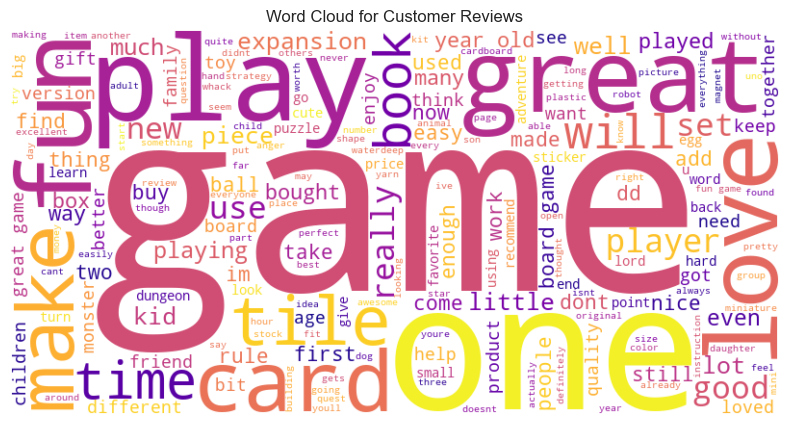

In [81]:
# Review: Create a word cloud and plot the image.
review_text = " ".join(df4_new['review_tokens'].astype(str))
review_text = re.sub(r"[^\w\s]", "", review_text)
review_wordcloud = WordCloud(width=800, height=400, background_color='white', 
                             colormap='plasma').generate(review_text)

# Plot the word cloud for customer reviews.
plt.figure(figsize=(10, 5))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Reviews')

Text(0.5, 1.0, 'Word Cloud for Customer Summaries')

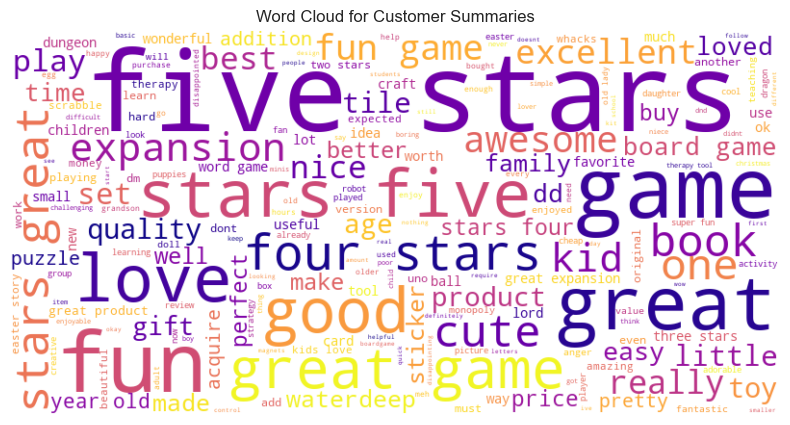

In [82]:
# Summary: Create a word cloud and plot the image.
summary_text = " ".join(df4_new['summary_tokens'].astype(str))
summary_text = re.sub(r"[^\w\s]", "", summary_text)
summary_wordcloud = WordCloud(width=800, height=400, background_color='white', 
                             colormap='plasma').generate(summary_text)

# Plot the word cloud for customer summaries.
plt.figure(figsize=(10, 5))
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Summaries')

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [83]:
# Importing the frequency distribution.
from nltk.probability import FreqDist

In [84]:
# Determine the frequency distribution.
review_list = review_text.split()
fdist_reviews = FreqDist(review_list)

# View the output.
print(fdist_reviews.most_common(15))

[('the', 5451), ('and', 3233), ('to', 3162), ('a', 3160), ('of', 2488), ('i', 2090), ('it', 2083), ('is', 1782), ('this', 1776), ('game', 1671), ('for', 1545), ('with', 1265), ('you', 1177), ('in', 1148), ('that', 1067)]


In [85]:
# Determine the frequency distribution.
summary_list = summary_text.split()
fdist_summary = FreqDist(summary_list)

# View the output.
print(fdist_summary.most_common(15))

[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('the', 261), ('a', 240), ('for', 232), ('fun', 218), ('to', 192), ('and', 168), ('it', 150), ('of', 139), ('this', 135), ('is', 103), ('love', 93)]


### 4b) Remove alphanumeric characters and stopwords

In [86]:
# Define stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove alphanumeric words (words with both letters and numbers).
    text = re.sub(r'\b\w*\d\w*\b', '', text)  
    
    # Tokenize words.
    words = text.split()
    
    # Remove stopwords.
    words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(words)

In [87]:
# Apply cleaning function to the review column.
df4_clean['review_clean'] = df4_clean['review'].astype(str).apply(clean_text)

# View DataFrame.
df4_clean['review_clean']

0       comes dms screen space screen absolute premium...
1       open letter unpainted miniatures bad spell car...
2       nice art nice printing two panels filled gener...
3                  amazing buy bought gift new dm perfect
4       review previous screens completely unnecessary...
                              ...                        
1995    perfect word game mixed ages mom perhaps givin...
1996    great game think would like first received tur...
1997                         great game keeps mind nimble
1998                                             fun game
1999    game fun lot like scrabble without little tile...
Name: review_clean, Length: 2000, dtype: object

In [88]:
# Apply cleaning function to the summary column.
df4_clean['summary_clean'] = df4_clean['summary'].astype(str).apply(clean_text)

# View DataFrame.
df4_clean['summary_clean']

0       fact space wasted art terribly informative nee...
1                another worthless dungeon masters screen
2                              pretty also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995                     perfect word game mixed ages mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                            love game
Name: summary_clean, Length: 2000, dtype: object

### 4c) Create wordcloud without stopwords and alphanumeric words

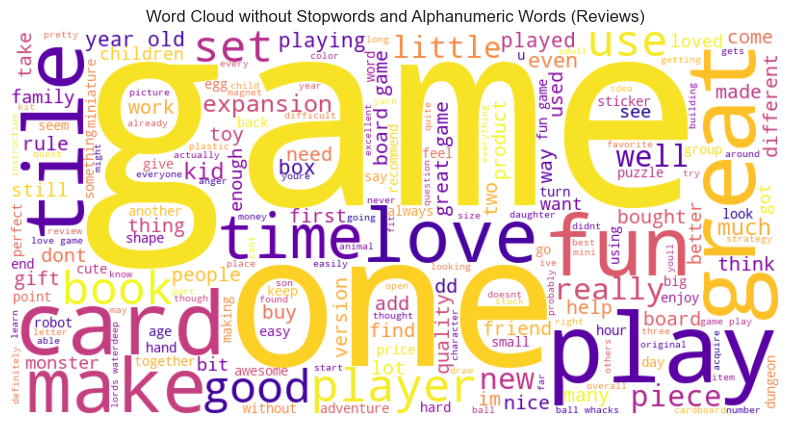

In [89]:
# Create a wordcloud without stop words and alphanumeric words.
# Join all cleaned reviews into a single text.
review_text = " ".join(df4_clean['review_clean'])

# Generate word cloud.
review2_wordcloud = WordCloud(width=800, height=400, background_color='white', 
                              colormap='plasma').generate(review_text)

# Plot the word cloud.
plt.figure(figsize=(10, 5))
plt.imshow(review2_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud without Stopwords and Alphanumeric Words (Reviews)')
plt.show()

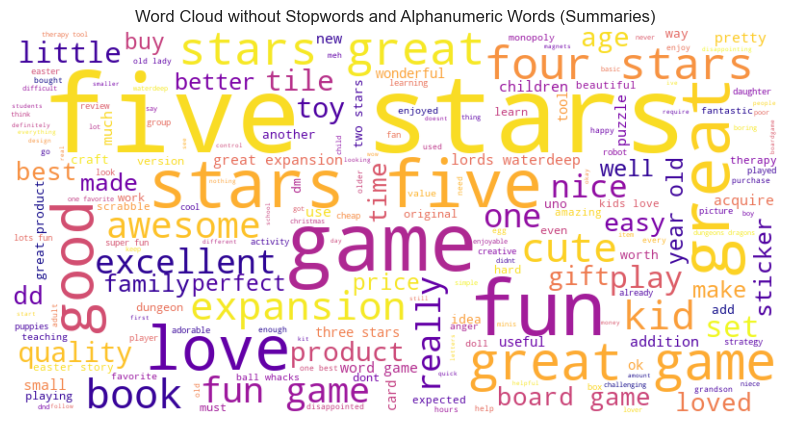

In [90]:
# Create a wordcloud without stop words and alphanumeric words.
# Join all cleaned summaries into a single text.
summary_text = " ".join(df4_clean['summary_clean'])

# Generate word cloud.
summary2_wordcloud = WordCloud(width=800, height=400, background_color='white', 
                               colormap='plasma').generate(summary_text)

# Plot the word cloud.
plt.figure(figsize=(10, 5))
plt.imshow(summary2_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud without Stopwords and Alphanumeric Words (Summaries)")
plt.show()

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [91]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [92]:
# Apply polarity to the customer_review column.
df4_new['review_polarity'] = df4_new['review'].apply(generate_polarity)

# View output.
df4_new['review_polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64

In [93]:
# Apply polarity to the customer_review column.
df4_new['summary_polarity'] = df4_new['summary'].apply(generate_polarity)

# View output.
df4_new['summary_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64

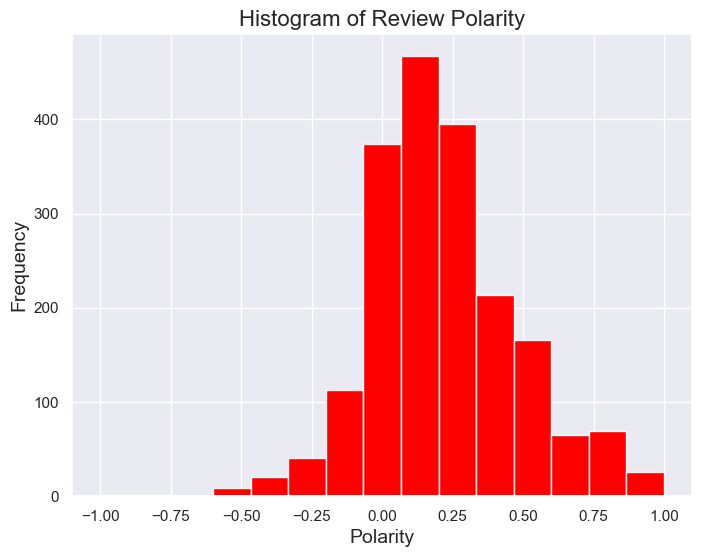

In [94]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity.

# Plotting the histogram for customer review polarity.
plt.figure(figsize=(8, 6))
plt.hist(df4_new['review_polarity'], bins=15, color='red')

# Customising the chart title and labels.
plt.title('Histogram of Review Polarity', fontsize=16)
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot.
plt.show()

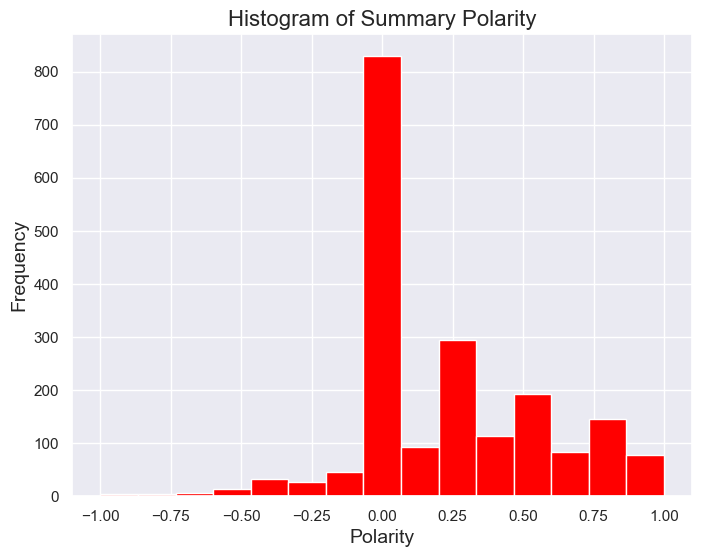

In [108]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity.

# Plotting the histogram for customer summary polarity.
plt.figure(figsize=(8, 6))
plt.hist(df4_new['summary_polarity'], bins=15, color='red')

# Customising the chart title and labels.
plt.title('Histogram of Summary Polarity', fontsize=16)
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot.
plt.show()

In [96]:
# Provided function.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [97]:
# Apply polarity to the customer_review column.
df4_new['review_subjectivity'] = df4_new['review'].apply(generate_subjectivity)

# View output.
df4_new['review_subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: review_subjectivity, dtype: float64

In [98]:
# Apply polarity to the customer_review column.
df4_new['summary_subjectivity'] = df4_new['summary'].apply(generate_subjectivity)

# View output.
df4_new['summary_subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summary_subjectivity, dtype: float64

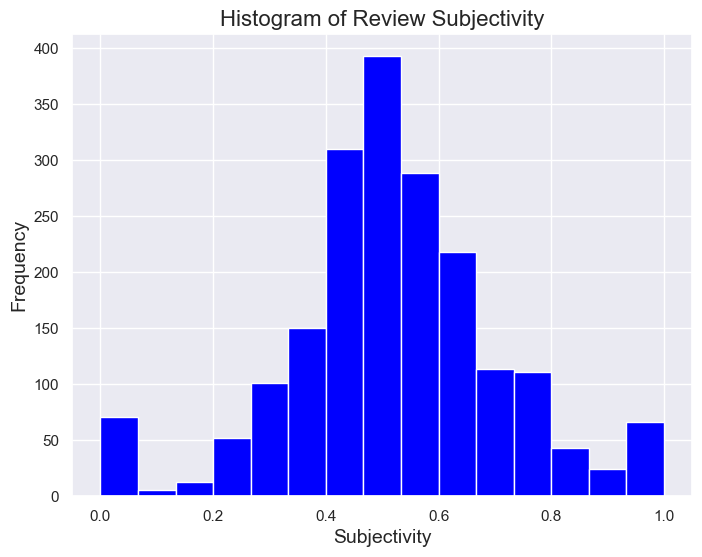

In [99]:
# Plotting the histogram for customer review polarity.
plt.figure(figsize=(8, 6))
plt.hist(df4_new['review_subjectivity'], bins=15, color='blue')

# Customising the chart title and labels.
plt.title('Histogram of Review Subjectivity', fontsize=16)
plt.xlabel('Subjectivity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot.
plt.show()

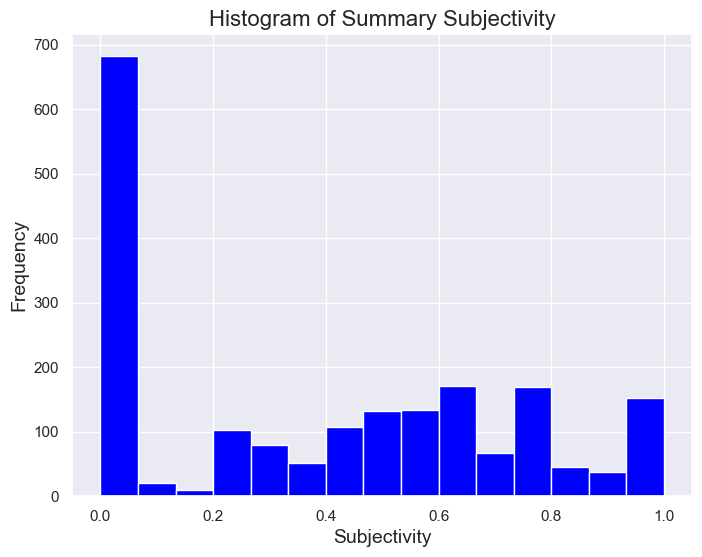

In [109]:
# Plotting the histogram for customer summary polarity
plt.figure(figsize=(8, 6))
plt.hist(df4_new['summary_subjectivity'], bins=15, color='blue')

# Customising the chart title and labels
plt.title('Histogram of Summary Subjectivity', fontsize=16)
plt.xlabel('Subjectivity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot.
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [101]:
# Top 20 negative reviews.
reviews_negativity = df4_new.nsmallest(20, 'review_polarity')
reviews_negativity = reviews_negativity[['review', 'review_polarity']]

# View output.
reviews_negativity

review  review_polarity
208   booo unles you are patient know how to measure...        -1.000000
182                   incomplete kit very disappointing        -0.780000
1804  im sorry i just find this product to be boring...        -0.583333
364   one of my staff will be using this game soon s...        -0.550000
117   i bought this as a christmas gift for my grand...        -0.500000
227   this was a gift for my daughter i found it dif...        -0.500000
230                    i found the directions difficult        -0.500000
290              instructions are complicated to follow        -0.500000
301                                           difficult        -0.500000
1524                         expensive for what you get        -0.500000
174   i sent this product to my granddaughter the po...        -0.491667
347   my 8 yearold granddaughter and i were very fru...        -0.446250
538   i purchased this on the recommendation of two ...        -0.440741
306                 very hard complicated to make these        -0.439583
427                     kids i work with like this game        -0.400000
437   this game although it appears to be like uno a...        -0.400000
497   my son loves playing this game it was recommen...        -0.400000
803                                this game is a blast        -0.400000
806         i bought this for my son he loves this game        -0.400000
824             was a gift for my son he loves the game        -0.400000

In [102]:
# Top 20 negative summaries.
summaries_negativity = df4_new.nsmallest(20, 'summary_polarity')
summaries_negativity = summaries_negativity[['summary', 'summary_polarity']]

# View output.
summaries_negativity

summary  summary_polarity
21                        the worst value ive ever seen         -1.000000
208    boring unless you are a craft person which i am          -1.000000
829                                              boring         -1.000000
1166  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
144                                        disappointed         -0.750000
631                                        disappointed         -0.750000
793                                        disappointed         -0.750000
1620                                       disappointed         -0.750000
363   promotes anger instead of teaching calming met...         -0.700000
885            too bad this is not what i was expecting         -0.700000
890                        bad qualityall made of paper         -0.700000
178     at age 31 i found these very difficult to make          -0.650000
101                                    small and boring         -0.625000
518                                          mad dragon         -0.625000
805                                       disappointing         -0.600000
1015                                      disappointing         -0.600000
1115                                      disappointing         -0.600000
1804                                      disappointing         -0.600000
1003  then you will find this board game to be dumb ...         -0.591667

In [110]:
# Top 20 positive reviews.
reviews_positivity = df4_new.nlargest(20, 'review_polarity')
reviews_positivity = positive_reviews[['review', 'review_polarity']]

# View output.
reviews_positivity

review  review_polarity
7                             came in perfect condition              1.0
165                                        awesome book              1.0
194                                        awesome gift              1.0
496   excellent activity for teaching selfmanagement...              1.0
524                         perfect just what i ordered              1.0
591                                   wonderful product              1.0
609                                  delightful product              1.0
621   wonderful for my grandson to learn the resurre...              1.0
790                                             perfect              1.0
933                                             awesome              1.0
1135                                        awesome set              1.0
1168               best set buy 2 if you have the means              1.0
1177               awesome addition to my rpg gm system              1.0
1301                                        its awesome              1.0
1401  one of the best board games i played in along ...              1.0
1550  my daughter loves her stickers awesome seller ...              1.0
1609  this was perfect to go with the 7 bean bags  i...              1.0
1715                                        awesome toy              1.0
1720  it is the best thing to play with and also min...              1.0
1726                  excellent toy to simulate thought              1.0

In [111]:
# Top 20 positive summaries.
summaries_positivity = df4_new.nlargest(20, 'summary_polarity')
summaries_positivity = positive_summaries[['summary', 'summary_polarity']]

# View output.
summaries_positivity

summary  summary_polarity
6                                  best gm screen ever               1.0
28                                   wonderful designs               1.0
32                                             perfect               1.0
80   theyre the perfect size to keep in the car or ...               1.0
134                            perfect for preschooler               1.0
140             awesome sticker activity for the price               1.0
161                                       awesome book               1.0
163                    he was very happy with his gift               1.0
187                                            awesome               1.0
210           awesome and welldesigned for 9 year olds               1.0
418                                            perfect               1.0
475                                          excellent               1.0
543                                          excellent               1.0
548                             excellent therapy tool               1.0
580  the pigeon is the perfect addition to a school...               1.0
599                          best easter teaching tool               1.0
647                                          wonderful               1.0
651              all f the mudpuppy toys are wonderful               1.0
657                                     awesome puzzle               1.0
662                               not the best quality               1.0

In [105]:
# Determine overall sentiment.
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Compute polarity scores from reviews.
df4_new['Polarity'] = df4_new['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Apply the function to assign sentiment labels.
df4_new['Sentiment'] = df4_new['Polarity'].apply(get_sentiment_label)

# Display the first few rows.
df4_new[['review', 'Polarity', 'Sentiment']].head()

review  Polarity Sentiment
0  when it comes to a dms screen the space on the... -0.036111  Negative
1  an open letter to galeforce9 your unpainted mi...  0.035952  Positive
2  nice art nice printing why two panels are fill...  0.116640  Positive
3  amazing buy bought it as a gift for our new dm...  0.578788  Positive
4  as my review of gf9s previous screens these we... -0.316667  Negative

In [106]:
review_labels = df4_new['Sentiment']

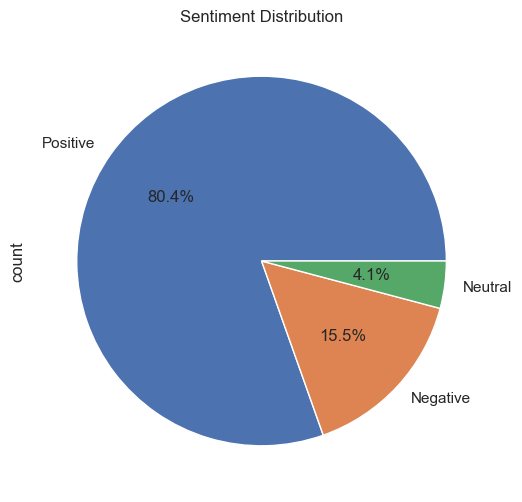

In [107]:
# Sentiment distribution visualization with percentages to 1 decimal point.
plt.figure(figsize=(8, 6))
pd.Series(review_labels).value_counts().plot(kind='pie', autopct='%1.1f%%')

# Setting the labels.
plt.title("Sentiment Distribution")
plt.show()

## 7. Discuss: Insights and observations

***Your observations here...***

Word Clouds

* Review Word Cloud (About the customers' experience with playing the games) - The dominant words were 'fun', 'great' and 'love'. Words such as 'book' and 'card' appeared a lot, suggesting the popularity of these type of games.
* Summary Word Cloud (Focused on the ratings) - The dominant words were 'excellent', 'fun', 'great' and 'love'. The summaries were mainly short, including the standout 'five stars', which like the review, indicates a positive sentiment.
* Examples of Alphanumeric Characters Removed - 1st, 2nd, 4
* Examples of Stopwords Removed - 'and', 'really', 'the', 'will'.


Histogram

* Review Polarity: Most of the reviews cluster around the neutral polarity (0) so they are neither strongly positive or negative. Has a right skew - meaning that more reviews have slightly positive sentiment than reviews with strongly negative reviews.
* Summary Polarity: Sharp peak at 0, so the majority of the summary texts are neutral. Uneven spread, which shows there is presence of both positive and negative summaries but they are mainly neutral. This means that the summaries are often balanced, even with more sentiment included.
* Review Subjectivity: Has a bell-curve shape, which peaks at 0.5 - meaning that the reviews are slightly subjective. There are more reviews that are very objective (0.0) than reviews that are purely subjective (1.0).
* Summary Subjectivity: A huge spike in (0.0) shows that most of the summaries were completly objective. The smaller peaks along the scale however shows that there were summaries with a variation of subjectivity.

Pie Chart

* To align with the wordclouds, a pie chart was generated to see the sentiments of the customers' reactions. 
* As shown above, 80% of the customers' reviews were positive, which shows that so far, Turtle Games have been doing a very good job. 
* The approximate 16% of reviews, which are negative, shows that there are still improvements that can be made within the company.

# 